In [5]:
import sys
import numpy as np
from numpy import linalg as LA
np.set_printoptions(threshold=np.nan)


image h,w = 559 , 712


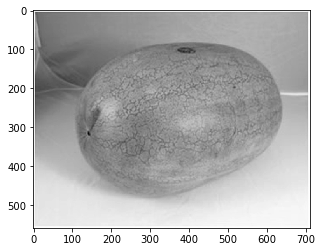

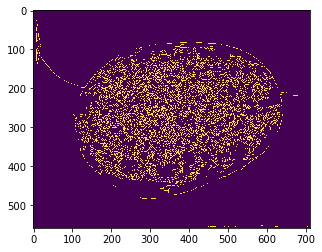

True

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("watermelon.jpg")
print('image h,w =',img.shape[0],',',img.shape[1])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
plt.show()

gray = cv2.GaussianBlur(gray,(3,3),0) # Gaussian Filter 3x3
canny = cv2.Canny(gray, 10, 60) # edge detection -> HW3 : EdgeDetection
plt.imshow(canny)
plt.show()
cv2.imwrite('edge_detection.jpg',canny)


### 1.PCA理論參考文章：
https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71

### 2. PCA實做參考Github
https://github.com/anupamish/PCA/blob/master/ImplementedPCA.py

In [36]:
# PCA : 把資料以解出來的eigenvalue就是變異量(variance)，eigenvector就是讓資料投影下去會有最大變異量的投影軸
def pca(matrix):
    mean = np.mean(matrix,0) 
    new_matrix = matrix - mean
    covariance_matrix = np.cov(np.transpose(new_matrix))
    w,v = LA.eig(covariance_matrix)
    U_Truncated = v[:,:2] #取最大的兩個維度
    U_Truncated_Transpose = np.transpose(U_Truncated)
    new_dimension_matrix = np.dot(U_Truncated_Transpose,np.transpose(new_matrix))
    newData = np.transpose(new_dimension_matrix)
    val=(-w).argsort()[:2] # 排序變異量大小
    result=v[...,val]

    return result.T, newData


In [37]:
direction,points = pca(canny)

In [54]:
direction.shape,points.shape

((2, 712), (559, 2))

In [64]:
ax,by = points[0]*-1
print(ax,by)

(737.8325775776021-0j) (83.92793163938089-0j)


In [66]:
#限制範圍在 h,w = 559,712 中
ax *= 0.1
by *= 0.1

In [67]:
#利用邊緣偵測結果 取偵測結果的平均中心點
y = 0 
x = 0
count = 0
for i in range(canny.shape[0]):
    for j in range(canny.shape[1]):
        if canny[i][j] == 255:
            y +=i
            x +=j
            count+=1

midy= y//count
midx= x//count
            

In [68]:
midx,midy

(362, 264)

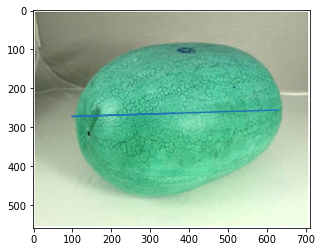

In [72]:
plt.imshow(img)
#邊緣偵測中心點取 PCA得到的斜率 即為中心點主軸
plt.plot([midx,midx-midy*1,365+midy*1], [midy,midy+by*1,midy-by*1])
plt.show()